In [122]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import pandas as pd

In [123]:
#File paths to the location of the data file on your computer
path_to_files = '/Users/loganroy/Desktop/School/Fall_2024/OBS/HW/HW1/'
data_file = 'KOUN_20200828_230247.cdf'
#netcdf4 open statement ('r' means read only). Not the only way to do this...
ncfile = Dataset('{}{}'.format(path_to_files,data_file),'r')

#reading variables from the datafile
Pressure = ncfile.variables['Pressure'][:]
Temperature = ncfile.variables['Temperature'][:]
RH = ncfile.variables['RH'][:]
Height = ncfile.variables['Height'][:]
Wspd = ncfile.variables['Wspd'][:]
Wdir = ncfile.variables['Wdir'][:]

#close the file you opened! 
ncfile.close()

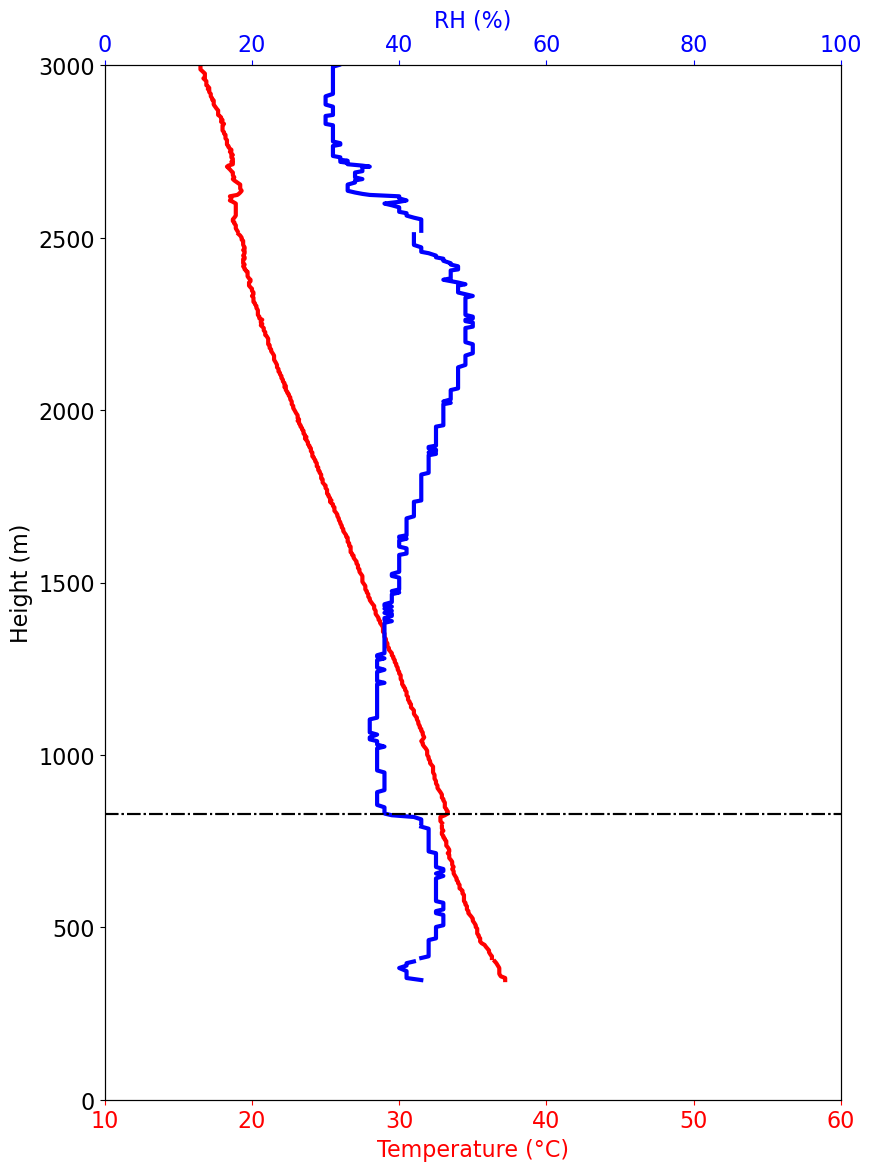

In [124]:
# A figure setting to make fonts big enough to read
plt.rcParams['font.size'] = 16

# building a figure with
# subplots can be used to make multiple or one 'subplot' which your
# axis object can refer to. 
fig, ax1 = plt.subplots(figsize=(9,12))
# Plot temperature
ax1.plot(Temperature, Height, 'r-', lw=3,label='Temperature (°C)')
#ax1.plot(Wspd, Height, 'r-', lw=3,label='Temperature (°C)')
#ax1.plot(Wdir, Height, 'r-', lw=3,label='Temperature (°C)')

#ax.plot(Wspd,Height,'g-',lw=3,label="Wind Speed")
#ax.plot(Wdir,Height,'k-',lw=3,label="Wind Direction")
# color the labels/ticks to match can be useful sometimes 
ax1.set_xlabel('Temperature (°C)',color='r')
ax1.tick_params('x', colors='r')
ax1.set_ylabel('Height (m)')
# setting data ranges for the axes
ax1.set_ylim(0,3000)
ax1.set_xlim(10,60)

ax2 = ax1.twiny()  # instantiate a second Axes that shares the same x-axis

color = 'blue'
ax2.set_xlabel('RH (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(RH,Height,'b-',lw=3,label="Relative Humidity")
ax2.plot([0,100],[830,830],c='k',ls='-.')
ax2.plot([0,100],[830,830],c='k',ls='-.')
ax2.set_xlim([0,100])
ax2.tick_params(axis='x', colors=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("prob1_fig.png")
plt.show()

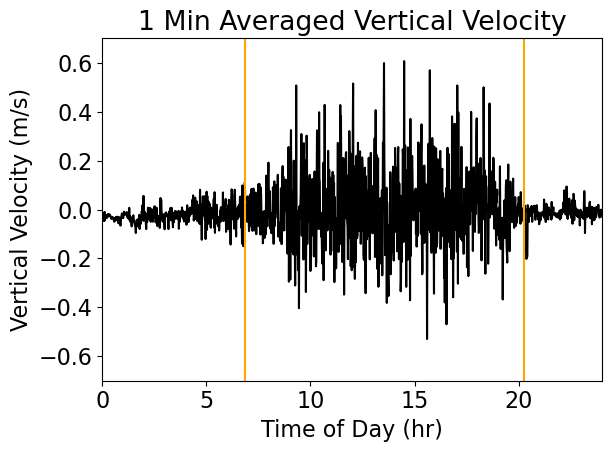

In [125]:
names = ['mean','min','max','var','sample number','start time','end time']


df1 = pd.read_csv("Data(1).csv",names=names,header=None)
time_of_day1 = [int(x[-13:-11])+(int(x[-10:-8])/60) -5 for x in df1['start time'][:]]
df2 = pd.read_csv("Data(2).csv",names=names,header=None)
time_of_day2 = [int(x[-13:-11])+(int(x[-10:-8])/60) -5+24 for x in df2['start time'][:]]


plt.plot(time_of_day2,df2['mean'],c='k')
plt.plot(time_of_day1,df1['mean'],c='k')
plt.plot([6.866,6.866],[-1,1],c='orange')
plt.plot([20.25,20.25],[-1,1],c='orange')
plt.xlim((0,24))
plt.ylim((-0.7,0.7))
plt.title('1 Min Averaged Vertical Velocity')
plt.ylabel("Vertical Velocity (m/s)")
plt.xlabel("Time of Day (hr)")
plt.tight_layout()
plt.savefig("prob_2.png")